In [1]:
import pandas as pd
pd.options.display.max_colwidth = 5000
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


# Text length

In [4]:
# character length of text snippet
train['text_length'] = train['text'].apply(len)

In [5]:
def split_text(x):
    return x.split()

In [6]:
# word count length of text snipped
train['word_count'] = train['text'].apply(split_text).apply(len)

In [7]:
train.describe()

,text_length,word_count
count,19579.000000,19579.000000
mean,149.057408,26.730477
std,106.800189,19.048353
min,21.000000,2.000000
25%,81.000000,15.000000
50%,128.000000,23.000000
75%,191.000000,34.000000
max,4663.000000,861.000000


## Training set

- MWS has unusually long text snippets compared to EAP and HPL

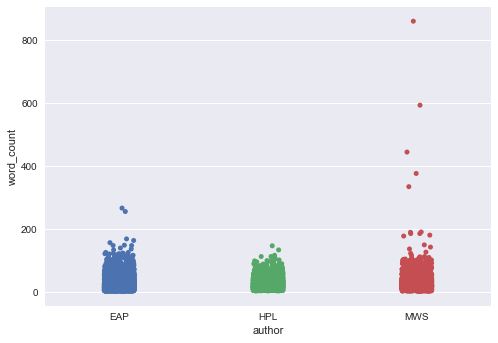

In [8]:
ax = sns.stripplot(x="author", y="word_count", data=train, jitter=True)

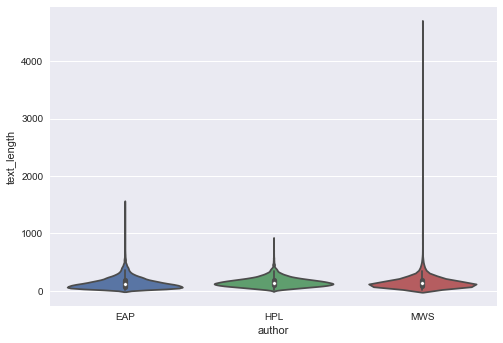

In [9]:
ax = sns.violinplot(x='author', y='text_length', data=train)

In [10]:
test['text_length'] = test['text'].apply(len)

## Test set

- We don't know the author
- There are not as many unusually long text snippets in the training set

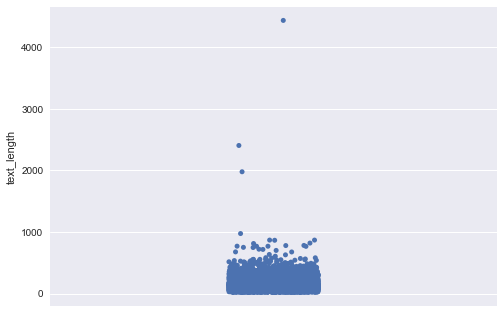

In [11]:
ax = sns.stripplot(y='text_length', data=test, jitter=True)

# Named Entity Recognition

- explore Persons and Places mentioned in the text snippets
- TODO check if there is an overlap, otherwise these could be highly informative features

In [12]:
import spacy

In [13]:
nlp = spacy.load("en_core_web_md")

In [14]:
ner = {}

In [15]:
# loop over text and associated authors
for text, author in zip(train.text, train.author):
    doc = nlp(text) # spacy pipeline
    if doc.ents:    # check for entities
        # print(author)
        for ent in doc.ents: # for each entity
            if ent.label_ in ["PERSON", "GPE", "LOC"]: # focus persons, places
                # print(ent.label_, ent.text)
                
                # populate author dictionary
                if author in ner.keys():
                    if ent.text not in ner[author]:
                        ner[author].append(ent.text)
                else:
                    ner[author] = [ent.text]

In [16]:
for key, val in ner.items():
    print(key, val)
    print("")

EAP ['Epicurus', 'California', "Von Kempelen's", 'Underduk', 'Ellison', 'Mein Gott', 'Latin', 'Theodore Sinivate', 'Kidd', 'Lofoden', 'Moskoe', 'Pierre Moreau', "Madame L'Espanaye", 'Hebrews', 'Athens', 'Epimenides', 'Laertius', 'Alexander', 'John Smith', 'Gazette', 'Thomas Hawk', 'Jupiter', 'Jxhn', 'Perdidit', 'Ferdinand Fitz Fossillus Feltspar', 'Launcelot', 'Cotopaxi', 'Flimen', 'Dupin', 'I. "Nose and', 'Mark Antony', 'Von Kempelen', 'Valence', 'Marie', 'P.', 'Baron', 'Windenough', 'Paris', 'William Wilson', 'Oxford', 'Keats', 'Oppodeldoc', 'Luchesi', 'Amontillado', 'Sherry', 'Everard Bringhurst', 'Osborne', 'Mason', 'Holland', 'Rotterdam', "D'Avisson Davidson", 'Mademoiselle', 'Marston', 'Geneva', 'Eleonora', 'Pompey', 'B.', 'M. St. Eustache', 'M. Beauvais', 'Greece', 'M. Maillardet', 'Rome', 'Eugenie', 'Vell', 'Bobby', 'Edward Stapleton', 'Frederick', 'Helseggen', 'Suky Snobbs', 'Thingum', 'Crab', 'Fortunato', 'Diana', "Mademoiselle L'Espanaye", 'Dumas', 'Etienne', 'Gad Fly" it', 

In [ ]:
# TODO only keep unique persons, locations for each Author